<a href="https://colab.research.google.com/github/Santhosh-S14/COMP-6771-Project/blob/main/COMP_6771_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

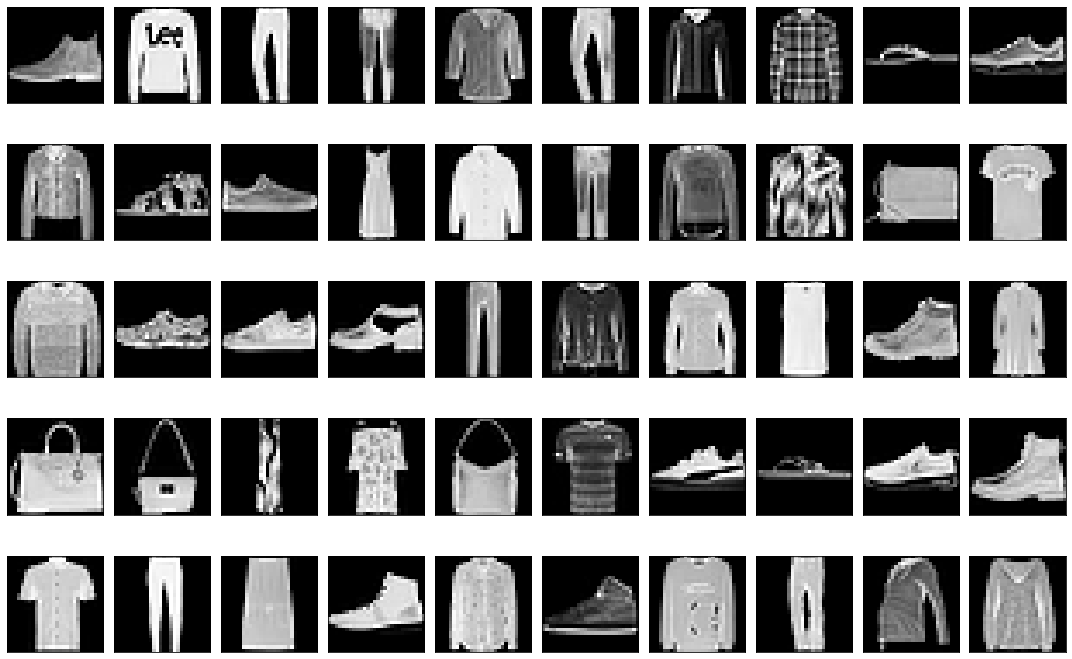

In [34]:
# load data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# generating a grid with samples of dataset
num_row = 5
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(50):
  ax = axes[i//num_col, i%num_col]
  ax.imshow(x_test[i], cmap='gray')
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)
plt.tight_layout()
plt.show()

In [35]:
# formatting the data
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')
x_train = x_train / 255
x_test = x_test /255

print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [36]:
# adding noise to the images
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Making sure that the array values are within the range of 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [37]:
# create model
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

In [38]:
tf.test.gpu_device_name()
!nvidia-smi -L

GPU 0: NVIDIA A100-SXM4-40GB (UUID: GPU-9fa04223-cfd3-bd41-0088-9b79eb7773ec)


In [39]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train_noisy, x_train, validation_data=(x_test_noisy, x_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 3s 4ms/step - loss: 0.0390 - val_loss: 0.0243
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0222 - val_loss: 0.0207
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0196 - val_loss: 0.0190
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0180 - val_loss: 0.0181
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0169 - val_loss: 0.0171
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0161 - val_loss: 0.0162
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0155 - val_loss: 0.0158
Epoch 8/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0149 - val_loss: 0.0156
Epoch 9/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0145 - val_loss: 0.0150
Epoch 10/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0142 - val_loss: 0.0149

In [40]:
pred = model.predict(x_test_noisy)
pred.shape

313/313 [==============================] - 1s 1ms/step


(10000, 784)

Test Images


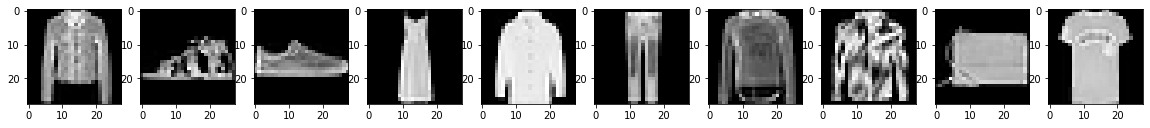

Test Images with Noise


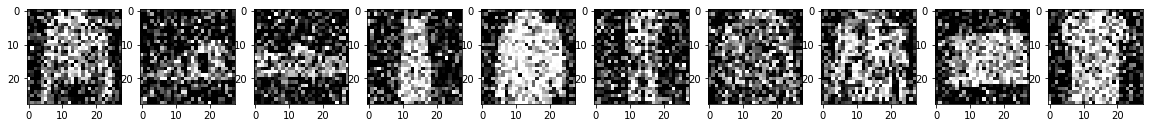

Reconstruction of Noisy Test Images


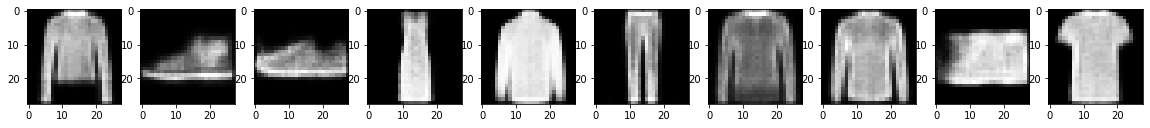

In [41]:
x_test = np.reshape(x_test, (10000,28,28)) *255
pred = np.reshape(pred, (10000,28,28)) *255
x_test_noisy = np.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()